<a href="https://colab.research.google.com/github/ansrl516/RTN_Paper/blob/main/RTN_f5_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as Variable
import numpy as np

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [ ]:
class Fig5(nn.Module):

    def __init__(self, M, n, EbNo):
        super().__init__()
        self.M = M
        self.n = n
        self.b = 1/(2*(math.log2(M)/n)*EbNo)
        self.LDense1 = nn.Linear(M,M)
        self.Lrelu1 = nn.ReLU()
        self.LDense2 = nn.Linear(M,2*n)
        #self.LBatchNorm = nn.BatchNorm1d(num_features=2*n, affine=False, track_running_stats=True)
        self.LDense3 = nn.Linear(2*n,M)
        self.Lrelu3 = nn.ReLU()
        self.LDense4 = nn.Linear(M,M)
        self.Lsoftmax = nn.Softmax(dim=1)
        self.RDense1 = nn.Linear(M,M)
        self.Rrelu1 = nn.ReLU()
        self.RDense2 = nn.Linear(M,2*n)
        #self.RBatchNorm = nn.BatchNorm1d(num_features=2*n, affine=False, track_running_stats=True)
        self.RDense3 = nn.Linear(2*n,M)
        self.Rrelu3 = nn.ReLU()
        self.RDense4 = nn.Linear(M,M)
        self.Rsoftmax = nn.Softmax(dim=1)

    def f1(self,x):
        x = self.LDense1(x)
        x = self.Lrelu1(x)
        x = self.LDense2(x)
        #x = self.LBatchNorm(x)
        m = torch.norm(x,dim=1)
        xT = torch.transpose(x,1,0)
        x = math.sqrt(self.n) * xT / m
        x = torch.transpose(x,1,0)
        return x
    def f2(self,y):
        x = self.RDense1(y)
        y = self.Rrelu1(y)
        y = self.RDense2(y)
        #y = self.RBatchNorm(y)
        m = torch.norm(y,dim=1)
        yT = torch.transpose(y,1,0)
        y = math.sqrt(self.n) * yT / m
        y = torch.transpose(y,1,0)
        return y

    def channel(self,x,y):
        n1 = torch.normal(0,math.sqrt(self.b),size=(x.shape[0],2*n))
        n2 = torch.normal(0,math.sqrt(self.b),size=(x.shape[0],2*n))
        u1 = x + y + n1
        u2 = y + x + n2
        return u1, u2

    def g(self,x,y):
        x = self.LDense3(x)
        x = self.Lrelu3(x)
        x = self.LDense4(x)
        x = self.Lsoftmax(x)
        y = self.RDense3(y)
        y = self.Rrelu3(y)
        y = self.RDense4(y)
        y = self.Rsoftmax(y)
        return x,y

    def forward(self,x,y):
        x = self.f1(x)
        y = self.f2(y)
        x,y = self.channel(x,y)
        x,y = self.g(x,y)
        return x,y

In [ ]:
#x=torch.tensor([[1.0,1,1,1],[2,2,2,2],[3,3,3,3]])
#soft = nn.Softmax(dim=1)
#print(torch.cat((x[:,0:2],x[:,0:2]),dim=1))
##soft(x[:,0:2])
print(data[4:8,:])
print(model(data[4:8,:]))
print(A[4:8,:])
print(model(A[4:8,:]))

tensor([[0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0.]])
tensor([[4.7384e-04, 2.7408e-05, 9.9949e-01, 9.5503e-06, 5.6984e-01, 8.0390e-02,
         3.3953e-01, 1.0238e-02],
        [3.9859e-05, 2.4352e-05, 3.7785e-07, 9.9994e-01, 3.3312e-01, 1.8818e-01,
         4.6619e-01, 1.2501e-02],
        [1.8164e-05, 9.9937e-01, 1.0864e-04, 5.0811e-04, 5.2299e-02, 4.2278e-02,
         5.8069e-02, 8.4735e-01],
        [9.9960e-01, 1.6624e-06, 1.1680e-04, 2.8119e-04, 6.9918e-01, 5.5314e-02,
         9.9131e-02, 1.4637e-01]], grad_fn=<CatBackward0>)
tensor([[0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1.]])
tensor([[0.2456, 0.0094, 0.7271, 0.0179, 0.4657, 0.1097, 0.3343, 0.0903],
        [0.0611, 0.0484, 0.0303, 0.8601, 0.3253, 0.2010, 0.3462, 0.1275],
        [0.0678, 0.0233, 0.01

In [ ]:
# Import Dataset of Epoch = 80, Batch_size = 32, Dataset = 6 * 10^4(Train) / 10^7(Test), Learning Rate = 0.001, Adam Optimizer
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

n, k = 4,4
dataset_num = 10 ** 6
data1 = F.one_hot(torch.randint(high=2**k,size=(dataset_num,)),num_classes=2**k)
data1 = data1.to(torch.float32)

data2 = F.one_hot(torch.randint(high=2**k,size=(dataset_num,)),num_classes=2**k)
data2 = data2.to(torch.float32)

class CustomDataset(Dataset):
    def __init__(self, data1, data2):
        self.data1 = data1
        self.data2 = data2
    def __len__(self):
        return len(self.data1)
    def __getitem__(self, idx):
        return self.data1[idx], self.data2[idx]

dataset = CustomDataset(data1,data2)
dataset_size = len(dataset)
print(dataset_size)
train_size = int(0.006 * dataset_size)
test_size = dataset_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))

1000000


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0.002382 0.002021


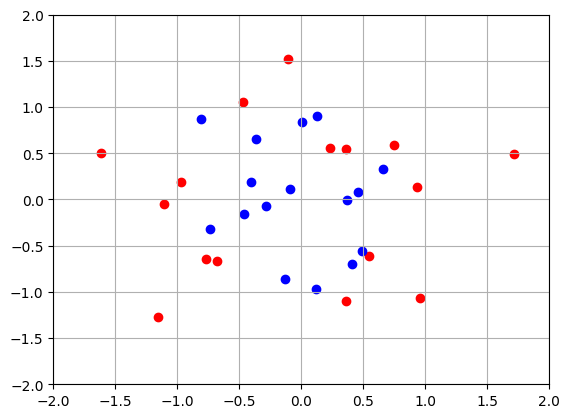

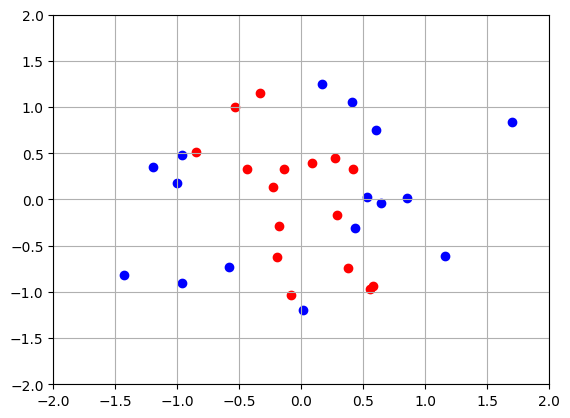

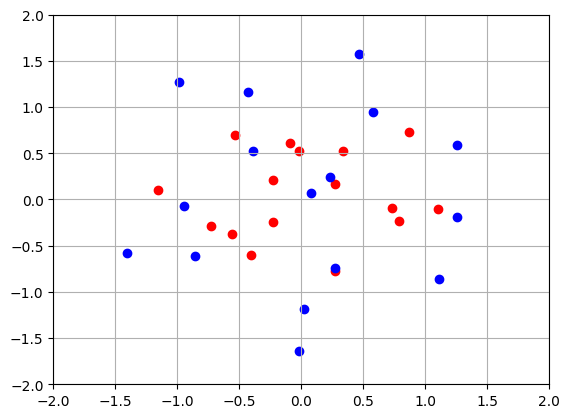

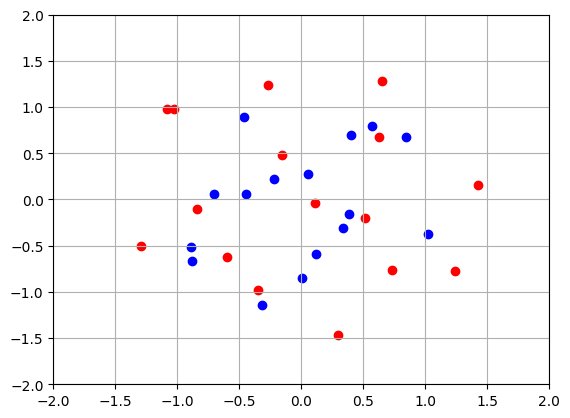

In [ ]:
EbNo = 10 ** (7/10)
n,k = 4,4
model = Fig5(2**k,n,EbNo)
criterion = nn.CrossEntropyLoss().to(device) # Define my loss functino
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(200):
    print(epoch)
    cost = 0.0
    i = 0
    a = 0.5
    for (_, (x,y)) in enumerate(train_dataloader):
        i += 1
        x = x.to(device)
        y = y.to(device)
        #print(x.shape)
        outputx, outputy = model(x,y)
        loss1 = criterion(x,outputx)
        loss2 = criterion(y,outputy)
        loss = a * loss1 + (1-a) * loss2

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print(loss.item(),loss1.item(),loss2.item())

        a = loss1.item()/(loss1.item()+loss2.item())
        cost += loss
    #print(EbNo, cost/i)
with torch.no_grad():
    x,y = dataset[:]
    x = x.to(device)
    y = y.to(device)
    Ox,Oy = model(x,y)
    Ox = Ox.detach().numpy()
    Oy = Oy.detach().numpy()
    x = x.detach().numpy()
    y = y.detach().numpy()
    x_index = np.argmax(Ox,axis=1)
    y_index = np.argmax(Oy,axis=1)
    x_true = np.argmax(x, axis=1)
    y_true = np.argmax(y, axis=1)
    Ps1 = len(np.nonzero(x_index - x_true)[0])/x_true.shape[0]
    Ps2 = len(np.nonzero(y_index - y_true)[0])/y_true.shape[0]
    print(Ps1,Ps2)

A = np.eye(2**k)
A = torch.tensor(A)
A = A.to(torch.float32)
coord1 = model.f1(A).detach().numpy()
coord2 = model.f2(A).detach().numpy()

import matplotlib.pyplot as plt
for dot in coord1:
    plt.scatter(dot[0],dot[1],color='r')
for dot in coord2:
    plt.scatter(dot[0],dot[1],color='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True)
plt.show()
for dot in coord1:
    plt.scatter(dot[2],dot[3],color='r')
for dot in coord2:
    plt.scatter(dot[2],dot[3],color='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True)
plt.show()
for dot in coord1:
    plt.scatter(dot[4],dot[5],color='r')
for dot in coord2:
    plt.scatter(dot[4],dot[5],color='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True)
plt.show()
for dot in coord1:
    plt.scatter(dot[6],dot[7],color='r')
for dot in coord2:
    plt.scatter(dot[6],dot[7],color='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True)
plt.show()